Authors: Matthew Buensalida, Alenna Cayton, Joaquin Escarraga

Section: S11

# Spotify Song Genre Classification

In this notebook, several models will be tried:

1. Gaussian Naive Bayes
2. Logistic Regression
3. Random Forest
4. Neural Networks

# Dataset

The dataset **Spotify Tracks DB** contains songs from spotify including 26 genres with a total of 232,725 tracks.

Link to Kaggle dataset: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db?fbclid=IwAR1ScyhFIzpafp-jl9bO7gdKWoQ1cyDKDYzPPLRC85GamjA898nwBHEOp8s


The dataset contains 232,725 **observations** (rows) which each represent a song across 18 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`genre`**: genre of the song (string)
- **`artist_name`**: artist of the song (string)
- **`track_name`**: name of track (string)
- **`track_id`**: id of track (string)
- **`popularity`**: popularity of track represented by an integer
- **`acousticness`**: confidence measure of acousticness
- **`danceability`**: suitability of a track for dancing based on a combination of tempo, rythm, stability, beat strengthm and regularity.
- **`duration_ms`**: duration ms of the track
- **`energy`**: confidence measure of energy representing a perceptual measure of intensity and activity
- **`instrumentalness`**: confidence measure of instrumentalness
- **`key`**: key of track
- **`liveness`**: confidence measure of liveness
- **`loudness`**: loudness of track (LUFS)
- **`mode`**: mode of track
- **`speechiness`**: confidence measure of speechiness
- **`tempo`**: BPM of track
- **`time_signature`**: time signature of track
- **`valence`**: confidence measure of valence 

## Reading the Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read CSV file.

In [2]:
df = pd.read_csv('SpotifyFeatures.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

## Dataset Preprocessing / Cleaning

Drop duplicate values.

In [4]:
df = df.drop_duplicates(subset='track_id', keep=False, inplace=False)
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


Drop unneeded columns.

In [5]:
df = df.drop(axis = 1, columns = ['artist_name', 'track_name', 'track_id', 'popularity'])

Re-arrange dataframe columns to match with Spotify API.

In [6]:
df = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre']]

Re-assign `key`, `mode`, and `time_signature` entries to their corresponding numerical values based on [this website](https://www.therecordindustry.io/analyzing-spotify-audio-features/).

In [7]:
# Drop the 8 rows with time signature 0/4 and remove a

df = df[df.time_signature != '0/4']

# Data's numerical representation

keys_key = {'C':  0, 'C#': 1, 'D':  2, 'D#': 3, 'E':  4, 'F':  5, 'F#': 6, 'G':  7, 'G#': 8, 'A':  9, 'A#': 10, 'B':  11}
keys_time_signature = {'1/4': 1, '2/4': 2, '3/4': 3, '4/4': 4, '5/4': 5}
keys_mode = {'Major': 1, 'Minor': 0}

# Remap values according to dictionaries above.

for i in keys_key.values():
    
    key = list(keys_key.keys())
    number = list(keys_key.values())
    df['key'] = df['key'].replace([str(key[i])], str(number[i]))
    
for i in keys_time_signature.values():
    
    key = list(keys_time_signature.keys())
    number = list(keys_time_signature.values())  
    df['time_signature'] = df['time_signature'].replace([str(key[i-1])], number[i-1])

for i in keys_mode.values():
    
    key = list(keys_mode.keys())
    number = list(keys_mode.values())
    df['mode'] = df['mode'].replace([str(key[i])], str(number[i]))

In [8]:
df['genre'].unique()

array(['Movie', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'R&B', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

Identify number of songs for each genre.

In [9]:
df['genre'].value_counts()

Comedy              9672
Anime               8556
Reggaeton           8526
Soundtrack          8446
Electronic          8186
Classical           8042
Ska                 8016
World               7960
Opera               7888
Reggae              7689
Movie               7480
Blues               7255
Jazz                7185
Country             6526
Children's Music    5402
Soul                4418
Folk                4342
Dance               2738
R&B                 2725
Indie               1974
Hip-Hop             1903
Rock                1865
Alternative         1817
Pop                 1329
Rap                  982
Children’s Music     604
A Capella            119
Name: genre, dtype: int64

Since we are only going to use 8 genres for this model, drop genres that can be a subgenre of another genre.

In [10]:
df = df[df['genre'].str.match('Soul|Indie|Anime|Country|Comedy|Blues|Movie|Soundtrack|Children’s Music|Folk|Alternative|World|Reggaeton|Ska|Reggae|Dance|Opera|Children\'s Music|A Capella') == False]

Check to see if the genres have been successfully dropped.

In [11]:
df['genre'].unique()

array(['Electronic', 'R&B', 'Hip-Hop', 'Rap', 'Classical', 'Pop', 'Jazz',
       'Rock'], dtype=object)

# Exploratory Data Analysis

Let us do a simple exploration with the data and see what we can find.

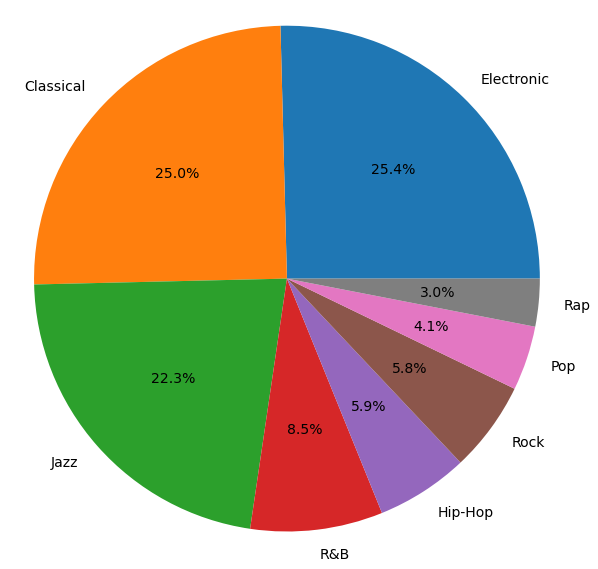

In [12]:
# Find percent of each genre
df_genre = df['genre'].value_counts() / len(df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()

# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()


The pie chart above shows that majority of the songs in the dataset are classical(25%), electronic(25.4%) and jazz(22.3%) music.

**Is there a correlation between the song attributes in the dataset?**

To answer this question, we can observe the correlation matrix. This is a commonly used tool to gain a better understanding of how much the variables are related to each other. 


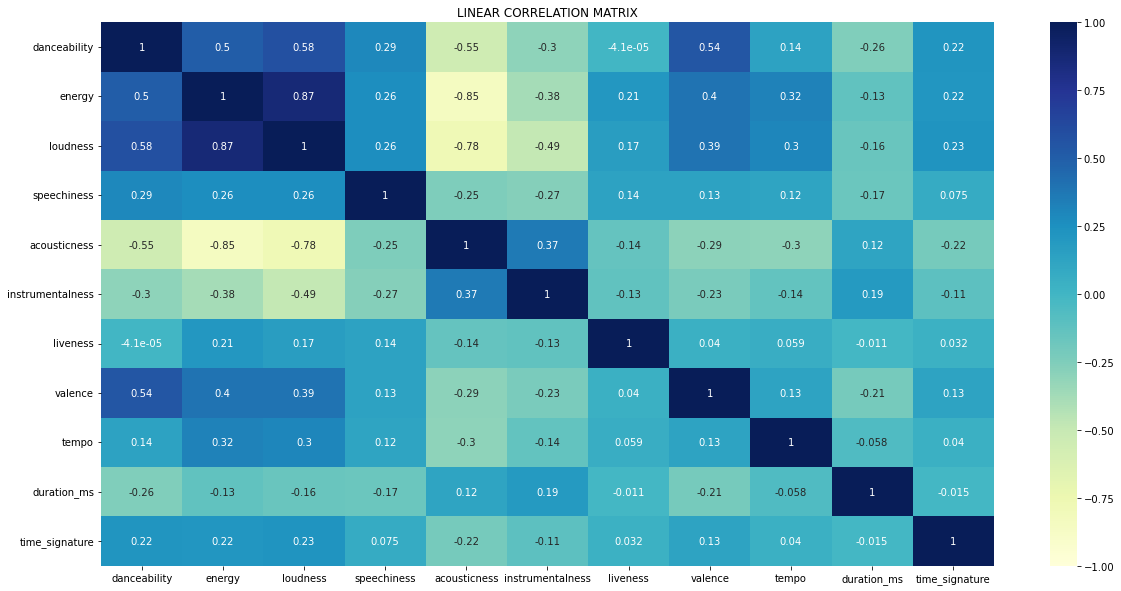

In [13]:
import seaborn as sns

df_matrix = df.drop(['genre'], axis = 1)

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_matrix.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

Upon observation of the linear correlation matrix, there seems to be a strong positive correlation between `loudness ` and `energy ` with a correlation coefficient of 0.82

**Are there certain song attributes that stand out per genre?**

To answer this question, we will compare the song attribute values using their mean values per genre. 

In [14]:
df[['genre','acousticness']].groupby('genre').mean().sort_values(by='acousticness', ascending=False)

,acousticness
genre,
Classical,0.872682
Jazz,0.510011
Pop,0.293093
R&B,0.282003
Rap,0.251441
Rock,0.208501
Hip-Hop,0.195898
Electronic,0.107848


In [15]:
df[['genre','danceability']].groupby('genre').mean().sort_values(by='danceability', ascending=False)

,danceability
genre,
Hip-Hop,0.725938
Rap,0.707508
R&B,0.642277
Pop,0.623026
Electronic,0.619469
Jazz,0.584280
Rock,0.509611
Classical,0.311555


In [16]:
df[['genre','duration_ms']].groupby('genre').mean().sort_values(by='duration_ms', ascending=False)

,duration_ms
genre,
Classical,316337.034320
Electronic,267172.723797
Jazz,263126.296033
Rock,251779.856300
R&B,220205.091009
Pop,214780.709556
Hip-Hop,207470.958487
Rap,194685.920570


In [17]:
df[['genre','energy']].groupby('genre').mean().sort_values(by='energy', ascending=False)

,energy
genre,
Electronic,0.752051
Rock,0.672042
Pop,0.647998
Hip-Hop,0.645662
Rap,0.598514
R&B,0.576216
Jazz,0.470373
Classical,0.175878


In [18]:
df[['genre','instrumentalness']].groupby('genre').mean().sort_values(by='instrumentalness', ascending=False)

,instrumentalness
genre,
Classical,0.602429
Jazz,0.386490
Electronic,0.343693
Rock,0.067755
Rap,0.031258
R&B,0.025704
Pop,0.024443
Hip-Hop,0.017129


In [19]:
df[['genre','liveness']].groupby('genre').mean().sort_values(by='liveness', ascending=False)[:26]

,liveness
genre,
Electronic,0.213489
Rock,0.198388
Hip-Hop,0.197641
Rap,0.179980
Pop,0.177140
R&B,0.176333
Jazz,0.172108
Classical,0.160034


In [20]:
df[['genre','loudness']].groupby('genre').mean().sort_values(by='loudness', ascending=False)

,loudness
genre,
Pop,-6.210878
Electronic,-6.785214
Hip-Hop,-7.007624
R&B,-7.382235
Rap,-7.697729
Rock,-8.099151
Jazz,-11.270528
Classical,-21.817642


In [21]:
df[['genre','speechiness']].groupby('genre').mean().sort_values(by='speechiness', ascending=False)

,speechiness
genre,
Hip-Hop,0.214923
Rap,0.201147
R&B,0.130579
Electronic,0.103370
Pop,0.076913
Jazz,0.073973
Rock,0.055619
Classical,0.052147


In [22]:
df[['genre','tempo']].groupby('genre').mean().sort_values(by='tempo', ascending=False)

,tempo
genre,
Electronic,126.815279
Rock,123.409935
Hip-Hop,122.601051
Pop,122.550709
Rap,119.833145
R&B,117.631531
Jazz,111.894777
Classical,104.617212


In [23]:
df[['genre','valence']].groupby('genre').mean().sort_values(by='valence', ascending=False)

,valence
genre,
Jazz,0.513024
Pop,0.510723
Rock,0.504130
Hip-Hop,0.482935
R&B,0.447904
Rap,0.434643
Electronic,0.381457
Classical,0.222763


**Key takeaways**: <br> 

Based on the tables above, these are the leading genres per song feature when averaged across all songs.

- Classical music tend to be the longest and the most instrumental out of all genres.
- Electronic music is usually fast and lively.
- Hip-hop music has a lot of lyrics and is very "dancy".
- Pop music is loud.
- Jazz is high in valence (upbeat and happy sounding).

|Classical       |Electronic|Hip-hop     |Pop     |Jazz   |
|---             |---       |---         |---     |---    |
|acousticness    |energy    |danceability|loudness|valence|
|duration        |liveness  |speechiness |        |       |
|instrumentalness|tempo     |            |        |       |

Finally, before we proceed to model building, we first have to convert our nominal labels into numerical labels.

In [24]:
from sklearn import preprocessing

In [25]:
label_enc = preprocessing.LabelEncoder()
df["genre"] = label_enc.fit_transform(df["genre"])

Let us see the mapping of the original nominal labels and the numerical codes.

In [26]:
print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

Mapping from nominal to numerical labels:
{'Classical': 0, 'Electronic': 1, 'Hip-Hop': 2, 'Jazz': 3, 'Pop': 4, 'R&B': 5, 'Rap': 6, 'Rock': 7}


In [27]:
df = df.reset_index()
df = df.drop(axis = 1, columns = ['index'])

Check dataframe after preprocessing. As expected, the `genre` column now has numerical values. 

In [28]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.536,0.879,1,-3.019,1,0.0621,0.074200,0.000000,0.0847,0.334,140.137,192000,4,1
1,0.793,0.703,0,-9.548,1,0.0581,0.000726,0.880000,0.0750,0.856,130.270,450800,4,1
2,0.611,0.697,2,-8.618,1,0.1330,0.019300,0.000000,0.3320,0.476,122.752,320357,4,1
3,0.794,0.811,6,-8.966,0,0.0380,0.042600,0.000001,0.1010,0.862,116.047,248413,4,1
4,0.775,0.585,10,-9.516,0,0.0271,0.042200,0.619000,0.0770,0.518,109.942,337560,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32212,0.630,0.688,2,-9.816,1,0.0266,0.124000,0.000048,0.1580,0.893,124.825,218040,4,7
32213,0.615,0.401,4,-14.070,0,0.0507,0.203000,0.000000,0.0860,0.672,87.959,264960,4,7
32214,0.394,0.682,9,-11.972,1,0.1110,0.033500,0.000231,0.3070,0.361,100.646,262747,4,7
32215,0.658,0.537,6,-7.535,0,0.0307,0.138000,0.000000,0.0572,0.887,132.115,116373,4,7


# Building the models

## Train/test split

Prepare the `X` feature dataset and `y` label vector.

In [29]:
X_genre =  df.values[:,:-1]
y_genre = df.values[:,-1].astype(int)

Split `X_genre` and `y_genre` into training and test sets.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_genre, y_genre, test_size = 0.15, random_state = 1, stratify = y_genre)
 
print("Genre train and test split")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test:  ", X_test.shape)
print("y_test:  ", y_test.shape)

Genre train and test split
X_train:  (27384, 13)
y_train:  (27384,)
X_test:   (4833, 13)
y_test:   (4833,)


Create a function that computes accuracy. Let us call it `compute_accuracy`.

In [32]:
def compute_accuracy(predictions, actual):
    
    num_correct = sum(predictions == actual)
    accuracy = (num_correct/len(actual)) * 100
    
    return accuracy

## Gaussian Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb_genre = GaussianNB()

In [35]:
nb_genre.fit(X_train, y_train)

GaussianNB()

In [36]:
nb_train_predictions = nb_genre.predict(X_train)

In [37]:
print("Training accuracy: ", compute_accuracy(nb_train_predictions, y_train), "%")

Training accuracy:  49.934268185801926 %


In [38]:
nb_test_predictions = nb_genre.predict(X_test)

In [39]:
print("Test set accuracy: ", compute_accuracy(nb_test_predictions, y_test), "%")

Test set accuracy:  50.5276225946617 %


### Hyperparameter Tuning (Gaussian NB)

In [40]:
nb_genre.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
params_NB = {'var_smoothing': np.logspace(0,-9, num = 100)}

In [43]:
# tuning the model
gs_NB = GridSearchCV(nb_genre, params_NB, cv = 10, scoring = 'accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

{'var_smoothing': 1e-09}

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr_genre = LogisticRegression()

In [46]:
lr_genre.fit(X_train, y_train)

LogisticRegression()

In [47]:
lr_train_predictions = lr_genre.predict(X_train)

In [48]:
print("Training accuracy: ", compute_accuracy(lr_train_predictions, y_train), "%")

Training accuracy:  32.27432077125329 %


In [49]:
lr_test_predictions = lr_genre.predict(X_test)

In [50]:
print("Test set accuracy: ", compute_accuracy(lr_test_predictions, y_test), "%")

Test set accuracy:  31.96772191185599 %


## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc_genre = RandomForestClassifier()

In [53]:
rfc_genre.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
rfc_genre.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
rfc_train_predictions = rfc_genre.predict(X_train)

In [56]:
print("Training accuracy: ", compute_accuracy(rfc_train_predictions, y_train), "%")

Training accuracy:  99.9926964650891 %


In [57]:
rfc_test_predictions = rfc_genre.predict(X_test)

In [58]:
print("Test set accuracy: ", compute_accuracy(rfc_test_predictions, y_test), "%")

Test set accuracy:  68.83923029174426 %


### Hyperparameter Tuning (Random Forest Classifier)

In [59]:
hyperparameters = [
    {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [5, 10, 20, 30],
    'min_samples_split' : [2, 4, 6, 10, 15, 20],
    'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
    }
]

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
rsrfc = RandomizedSearchCV(rfc_genre,hyperparameters, n_iter=20,cv =5, random_state=42 )
rsrfc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [5, 10, 20, 30],
                                         'max_leaf_nodes': [3, 5, 10, 20, 50,
                                                            100],
                                         'min_samples_split': [2, 4, 6, 10, 15,
                                                               20],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500]}],
                   random_state=42)

In [62]:
print("Best tuned random forest performance: \t", rsrfc.best_score_*100, "%")

Best tuned random forest performance: 	 65.56382937719634 %


In [64]:
best_model = rsrfc.best_estimator_

In [65]:
predictions_test = rfc_genre.predict(X_test)

acc = compute_accuracy(predictions_test, y_test)
print("Best model test accuracy:",acc,"%")

Best model test accuracy: 68.83923029174426 %


## Neural Networks

In [66]:
# import here
from sklearn.neural_network import MLPClassifier 

In [67]:
nn_genre = MLPClassifier()

In [68]:
nn_genre.fit(X_train, y_train)

MLPClassifier()

In [69]:
nn_train_predictions = nn_genre.predict(X_train)

In [70]:
print("Training accuracy: ", compute_accuracy(nn_train_predictions, y_train), "%")

Training accuracy:  24.780893952673093 %


In [71]:
nn_test_predictions = nn_genre.predict(X_test)

In [72]:
print("Test set accuracy: ", compute_accuracy(nn_test_predictions, y_test), "%")

Test set accuracy:  24.663769915166565 %


# Spotify API

Import necessary libraries and initialize `Spotify` object.

In [73]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [74]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="9d4f5395df08402c8b25d34f50f7504f",
                                                           client_secret="3a450bdfecdb42d0a66e81320b8012ee"))

Choose a song and **enter its Spotify link** below!

In [ ]:
song_link = input("Enter song link: ")

In [ ]:
result_object = sp.track(song_link)
title = result_object.get('name')
artist = result_object.get('album').get('artists')[0].get('name')

In [ ]:
print('The title of the song is ' + title + ' by ' + artist + '. Its audio features will be shown below.')

Retreive the song's audio features using the `Spotify` object and remove unecessary keys.

In [ ]:
audio_features = sp.audio_features(song_link)

keys_to_remove = ('type', 'uri', 'track_href', 'analysis_url', 'id')

for key in keys_to_remove:
    audio_features[0].pop(key, None)

In [ ]:
pd.DataFrame(audio_features)

Convert dictionary into list to be used by the model.

In [ ]:
test_case = list(audio_features[0].values())

Predict the song's genre using the model.

In [ ]:
label_enc.classes_[df['genre'].unique()]

**Model objects**
- Naive Bayes: `nb_genre`
- Logistic Regression: `lr_genre` 
- Random Forest Classifier: `rfc_genre`

In [ ]:
prediction = label_enc.classes_[rfc_genre.predict([test_case])[0]]
print("The model's predicted genre for " + title + ' is ' + prediction + '.')